In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.4MB/s 
     |████████████████████████████████| 8.7MB 7.6MB/s 
     |████████████████████████████████| 808kB 37.9MB/s 
     |████████████████████████████████| 2.1MB 39.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import json

In [ ]:
file = open("drive/My Drive/DataSets/time_series_2018-2019.json",)

In [ ]:
jsonData = json.load(file)

In [ ]:
type(jsonData)

dict

In [ ]:
jsonData

{'items': [{'access': 'all-access',
   'agent': 'user',
   'article': 'Time_series',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2018010100',
   'views': 502},
  {'access': 'all-access',
   'agent': 'user',
   'article': 'Time_series',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2018010200',
   'views': 1073},
  {'access': 'all-access',
   'agent': 'user',
   'article': 'Time_series',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2018010300',
   'views': 1286},
  {'access': 'all-access',
   'agent': 'user',
   'article': 'Time_series',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2018010400',
   'views': 1255},
  {'access': 'all-access',
   'agent': 'user',
   'article': 'Time_series',
   'granularity': 'daily',
   'project': 'en.wikipedia',
   'timestamp': '2018010500',
   'views': 1124},
  {'access': 'all-access',
   'agent': 'user',
   'article': 'Time_series',
   'gr

In [ ]:
jsonData = jsonData['items']
df = pd.DataFrame.from_dict(jsonData)

In [ ]:
df.head()

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Time_series,daily,2018010100,all-access,user,502
1,en.wikipedia,Time_series,daily,2018010200,all-access,user,1073
2,en.wikipedia,Time_series,daily,2018010300,all-access,user,1286
3,en.wikipedia,Time_series,daily,2018010400,all-access,user,1255
4,en.wikipedia,Time_series,daily,2018010500,all-access,user,1124


In [ ]:
df.drop(['project','article','access','agent','granularity'],axis=1,inplace=True)

In [ ]:
df.head()

,timestamp,views
0,2018010100,502
1,2018010200,1073
2,2018010300,1286
3,2018010400,1255
4,2018010500,1124


In [ ]:
df['timestamp'] = df['timestamp'].apply(lambda x: x[0:4]+"-"+x[4:6]+"-"+x[6:8])

In [ ]:
df.head()

,timestamp,views
0,2018-01-01,502
1,2018-01-02,1073
2,2018-01-03,1286
3,2018-01-04,1255
4,2018-01-05,1124


In [ ]:
df.tail()

,timestamp,views
725,2019-12-27,795
726,2019-12-28,648
727,2019-12-29,732
728,2019-12-30,904
729,2019-12-31,705


In [ ]:
df.shape

(730, 2)

In [ ]:
df.to_csv("drive/My Drive/DataSets/pageviews_2018-2019.csv",index=False)

In [ ]:
pageviews = pd.read_csv("drive/My Drive/DataSets/pageviews_2018-2019.csv",index_col=[0],parse_dates=True,squeeze=True)

In [ ]:
pageviews.head()

timestamp
2018-01-01     502
2018-01-02    1073
2018-01-03    1286
2018-01-04    1255
2018-01-05    1124
Name: views, dtype: int64

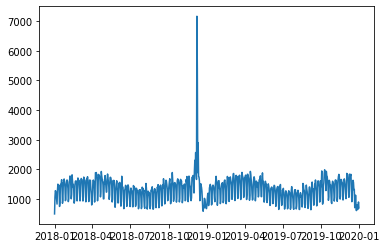

In [ ]:
plt.plot(pageviews)

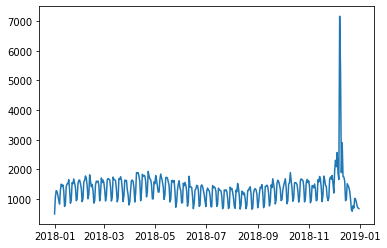

In [ ]:
plt.plot(pageviews['2018'])

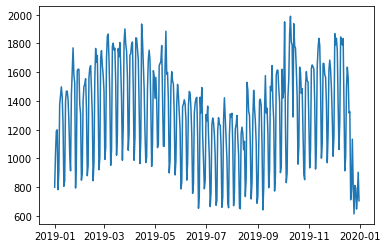

In [ ]:
plt.plot(pageviews['2019'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df):
  rolling_mean = df.rolling(window = 12).mean()
  rolling_std = df.rolling(window = 12).std()

  plt.plot(df,color="red",label="Original Curve")
  plt.plot(rolling_mean,color="blue",label="Rolling mean")
  plt.plot(rolling_std,color="green",label="Rolling std")
  plt.legend(loc="best")
  plt.title("Original vs. Mean vs. Std")
  plt.show()

  dfresult = adfuller(df,autolag="AIC")
  print("Results of Dickey Fuller test: ")
  print("Test Statistic: ",dfresult[0])
  print("p-value: ",dfresult[1])
  print("#Lags used: ",dfresult[2])
  print("#Observations used: ",dfresult[3])

  for key,value in dfresult[4].items():
    print("Critical Value {}: {}".format(key,value))

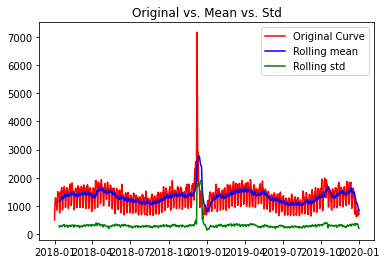

Results of Dickey Fuller test: 
Test Statistic:  -3.8858513977864866
p-value:  0.002141475941574287
#Lags used:  20
#Observations used:  709
Critical Value 1%: -3.439606888036868
Critical Value 5%: -2.865625121924057
Critical Value 10%: -2.5689454046801052


In [ ]:
check_stationarity(pageviews)

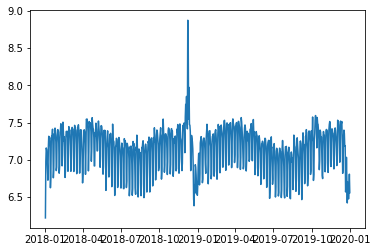

In [ ]:
import numpy as np
log_df = np.log(pageviews)
plt.plot(log_df)

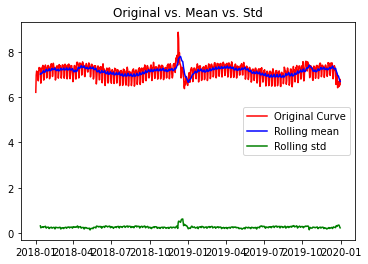

Results of Dickey Fuller test: 
Test Statistic:  -2.9986950829948973
p-value:  0.0350164429384602
#Lags used:  20
#Observations used:  709
Critical Value 1%: -3.439606888036868
Critical Value 5%: -2.865625121924057
Critical Value 10%: -2.5689454046801052


In [ ]:
check_stationarity(log_df)

Test statistic is smaller than 5% critical value. This time series is stationary with 95% confidence

In [ ]:
print(log_df.shape)

(730,)


In [ ]:
train=log_df[:630]
test=log_df[630:]
print(train.shape,test.shape)

(630,) (100,)


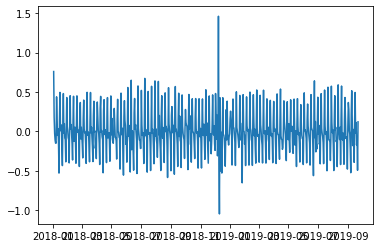

In [ ]:
log_df_diff = train - train.shift()
log_df_diff.dropna(inplace=True)
plt.plot(log_df_diff)

Checking stationarity of time series after differencing once

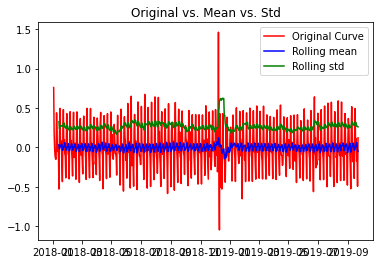

Results of Dickey Fuller test: 
Test Statistic:  -7.95620100021386
p-value:  3.032681577662807e-12
#Lags used:  20
#Observations used:  608
Critical Value 1%: -3.4411511898545206
Critical Value 5%: -2.866305414688104
Critical Value 10%: -2.569307861950312


In [ ]:
check_stationarity(log_df_diff)

Test statistic is smaller than 1% critical value. Differenced time series is better than the original in terms of stationarity

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


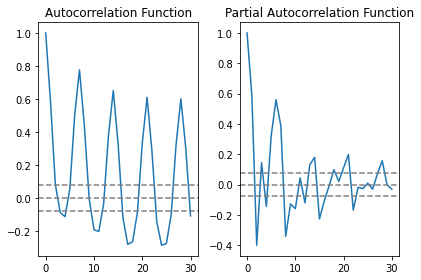

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lags_acf = acf(train, nlags=30)
lags_pacf = pacf(train, nlags=30,method="ols")

plt.subplot(121) 
plt.plot(lags_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lags_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

ACF Plot to find q value.

q= Order of MA(Moving Average) model

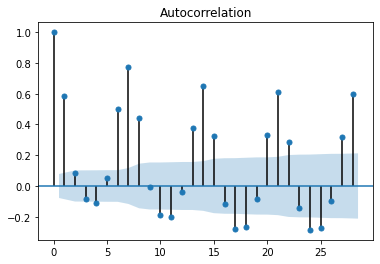

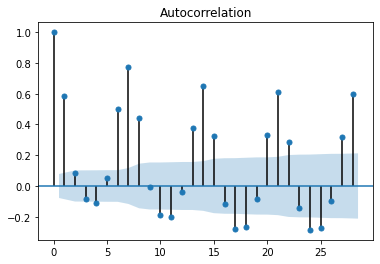

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(train)

PACF plot to find p value

p = Order of AR(Auto-Regressive) model

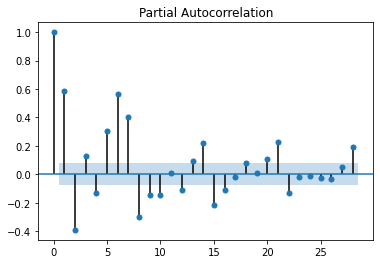

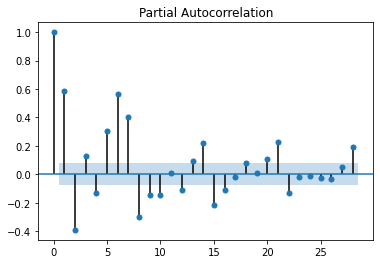

In [ ]:
plot_pacf(train)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

AR model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 13.5060')

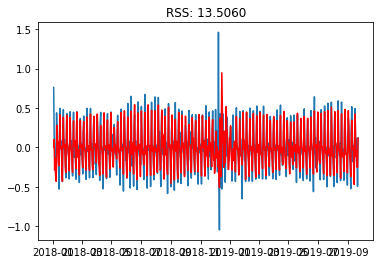

In [ ]:
model_AR = ARIMA(train, order=(10, 1, 0))  
results_AR = model_AR.fit(disp=-1)  
plt.plot(log_df_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_df_diff)**2))

MA model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 28.3686')

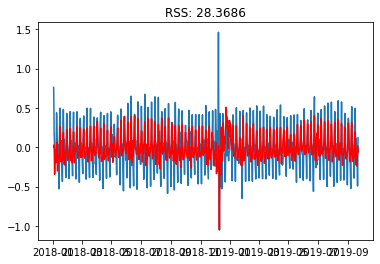

In [ ]:
model_MA = ARIMA(train, order=(0, 1, 3))  
results_MA = model_MA.fit(disp=-1)  
plt.plot(log_df_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_df_diff)**2))

ARIMA model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'RSS: 12.5787')

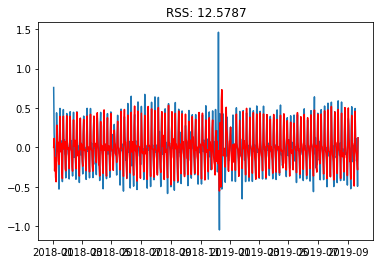

In [ ]:
model_ARIMA = ARIMA(train, order=(10, 1, 3))  
results_ARIMA = model_ARIMA.fit(disp=-1)  
plt.plot(log_df_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_df_diff)**2))

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train, trace=True,start_p=9,max_p=16,d=1,start_q=1,max_q=8,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(9,1,1)(0,0,0)[0] intercept   : AIC=-620.181, Time=4.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=128.934, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=122.194, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=95.989, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=126.941, Time=0.07 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=-619.647, Time=3.76 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=-626.257, Time=3.71 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=-617.486, Time=2.87 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=-628.044, Time=4.77 sec
 ARIMA(11,1,0)(0,0,0)[0] intercept   : AIC=-630.813, Time=4.87 sec
 ARIMA(12,1,0)(0,0,0)[0] intercept   : AIC=-646.530, Time=6.01 sec
 ARIMA(13,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=6.89 sec
 ARIMA(12,1,1)(0,0,0)[0] intercept   : AIC=-651.836, Time=7.22 sec
 ARIMA(11,1,1)(0,0,0)[0] intercept   : AIC=-624.118, Time=5.93 sec
 ARIMA(13,1,1)(0,0,0)[0] intercept   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'RSS: 11.0622')

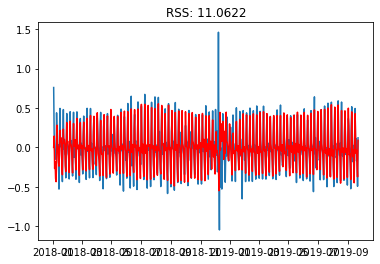

In [ ]:
model_ARIMA2 = ARIMA(train, order=(12, 1, 4))  
results_ARIMA2 = model_ARIMA2.fit(disp=-1)  
plt.plot(log_df_diff)
plt.plot(results_ARIMA2.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA2.fittedvalues-log_df_diff)**2))

In [ ]:
results_ARIMA2.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.views   No. Observations:                  629
Model:                ARIMA(12, 1, 4)   Log Likelihood                 394.675
Method:                       css-mle   S.D. of innovations              0.128
Date:                Sat, 28 Nov 2020   AIC                           -753.350
Time:                        14:39:48   BIC                           -673.356
Sample:                    01-02-2018   HQIC                          -722.276
                         - 09-22-2019                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0007      0.002      0.378      0.705      -0.003       0.005
ar.L1.D.views      0.4275        nan        nan        nan         nan         nan
ar.L2.D.views     -1.4664        nan        nan        nan         nan         nan
ar.L3.D.views      0.4470        nan        nan        nan         nan         nan
ar.L4.D.views     -1.3158        nan        nan        nan         nan         nan
ar.L5.D.views     -0.1526      0.072     -2.106      0.035      -0.295      -0.011
ar.L6.D.views     -0.6331      0.103     -6.163      0.000      -0.834      -0.432
ar.L7.D.views      0.1049      0.051      2.044      0.041       0.004       0.206
ar.L8.D.views     -0.5498      0.049    -11.296      0.000      -0.645      -0.454
ar.L9.D.views      0.2127      0.063      3.372      0.001       0.089       0.336
ar.L10.D.views    -0.4351      0.058     -7.517      0.000      -0.549      -0.322
ar.L11.D.views     0.1797      0.047      3.865      0.000       0.089       0.271
ar.L12.D.views    -0.1786      0.030     -6.035      0.000      -0.237      -0.121
ma.L1.D.views     -0.8130      0.006   -130.300      0.000      -0.825      -0.801
ma.L2.D.views      1.3703        nan        nan        nan         nan         nan
ma.L3.D.views     -0.8165        nan        nan        nan         nan         nan
ma.L4.D.views      0.9209        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0271           -0.5257j            1.1538           -0.4247
AR.2            -1.0271           +0.5257j            1.1538            0.4247
AR.3            -0.2223           -0.9751j            1.0001           -0.2857
AR.4            -0.2223           +0.9751j            1.0001            0.2857
AR.5            -0.4460           -1.0853j            1.1734           -0.3120
AR.6            -0.4460           +1.0853j            1.1734            0.3120
AR.7             0.6235           -0.7825j            1.0005           -0.1429
AR.8             0.6235           +0.7825j            1.0005            0.1429
AR.9             1.1071           -0.6999j            1.3098           -0.0897
AR.10            1.1071           +0.6999j            1.3098            0.0897
AR.11            0.4681           -1.2486j            1.3335           -0.1929
AR.12            0.4681           +1.2486j            1.3335            0.1929
MA.1             0.6670           -0.7878j            1.0322           -0.1382
MA.2             0.6670           +0.7878j            1.0322            0.1382
MA.3            -0.2237           -0.9844j            1.0095           -0.2856
MA.4            -0.2237           +0.9844j            1.0095            0.2856
-

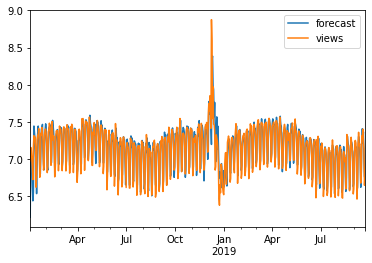

In [ ]:
results_ARIMA2.plot_predict(dynamic=False)
plt.show()

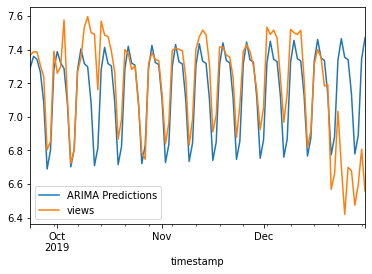

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=results_ARIMA2.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

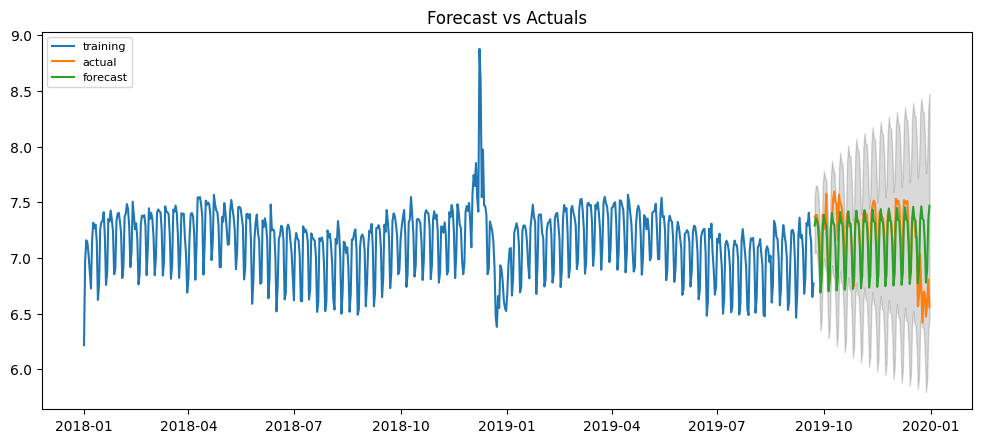

In [ ]:
fc, se, conf = results_ARIMA2.forecast(len(test), alpha=0.05)  

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()